# EmoNet: Advanced Emotion Classification Using NLP Techniques
## Problem Statement:

Create an advanced emotion classification model leveraging state-of-the-art Natural Language Processing (NLP) techniques to accurately identify and categorize emotions expressed in textual data. The objective is to develop a model capable of effectively predicting the emotional sentiment associated with each document in a given dataset. This entails training the model on a diverse corpus of documents annotated with corresponding emotion labels and optimizing its performance to achieve high accuracy and robustness in classifying emotions across various contexts. The resulting model should exhibit superior capabilities in understanding and interpreting nuanced emotional nuances, enabling its application in a wide range of real-world scenarios such as sentiment analysis, customer feedback analysis, and mood detection in conversational interfaces.

## Aim:

- Develop a high-performing emotion classification model using NLP techniques to accurately categorize emotions expressed in textual data.

## Dataset Attributes

- Text Data: Each entry contains a piece of text representing a statement or expression of emotion. These textual documents vary in length and content, reflecting the diverse range of emotional experiences.

- Emotion Label: The emotion label indicates the predominant emotion conveyed in the corresponding text data. Emotions such as sorrow, rage, happiness, amaze, care, and scare are represented in the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.tree import DecisionTreeClassifier
import string
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
from gensim.models import Word2Vec
import warnings
warnings.filterwarnings("ignore")

#nltk.download('punkt')
#nltk.download('stopwords')

# Load Dataset

In [2]:
filename = r".\data\train.csv"
df_train = pd.read_csv(filename)

filename = r".\data\test.csv"
df_test = pd.read_csv(filename)

# Questions
**Instructions:**
1.  Answer all questions.
2.  Justify your answers with appropriate reasoning, code, or calculations.
3.  Ensure your code is well-commented to explain your logic.
4.  Total Marks: 100

# Question 1 : Data Analysis (10 pt)

- Describe the dataset, including the number of entries (documents) present.
- Determine the frequency of each emotion category in the dataset.
- Utilize visualizations such as bar charts or pie charts to display the distribution of emotions in the dataset.
- Interpret the statistical plots to extract meaningful insights that can inform the development of the EmoNet model.

In [3]:
print("Summary of the dataset:")
print(df_train.info())

Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     15000 non-null  object
 1   Emotion  15000 non-null  object
dtypes: object(2)
memory usage: 234.5+ KB
None


In [4]:
emotion_counts = df_train['Emotion'].value_counts()

emotion_counts_table = pd.DataFrame(emotion_counts)
emotion_counts_table.columns = ['Frequency']
emotion_counts_table.index.name = 'Emotion'
print(emotion_counts_table)

           Frequency
Emotion             
happiness       5034
sorrow          4368
rage            2016
scare           1817
care            1223
amaze            542


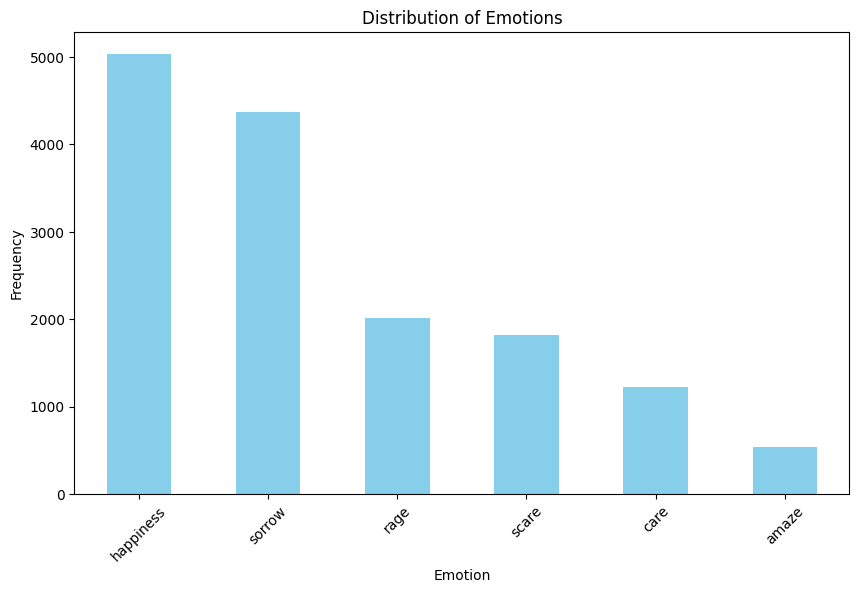

In [5]:
# Plotting the distribution of emotions
plt.figure(figsize=(10, 6))
emotion_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

**Emotion Distribution**: The frequencies provide an overview of the prevalence of different emotions. Happiness and sorrow appear to be the most common emotions, followed by rage, scare, care, and amazement.


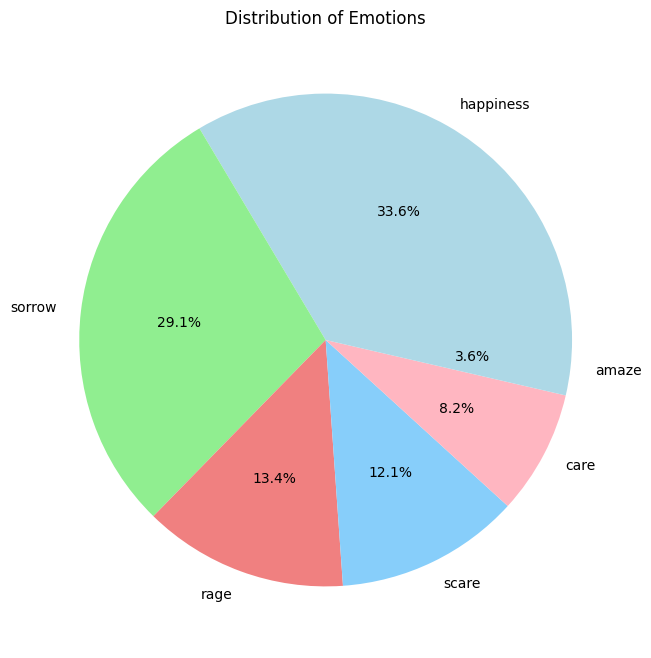

In [6]:
plt.figure(figsize=(8, 8))
emotion_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink'])
plt.title('Distribution of Emotions')
plt.ylabel('')
plt.show()

In [7]:
df_train.nunique()

Text       14973
Emotion        6
dtype: int64

There are 14,973 distinct text samples and 6 distinct emotion labels 

In [8]:
df_train.isnull().sum()

Text       0
Emotion    0
dtype: int64

We have no Null values


In [9]:
df_train.shape

(15000, 2)

In [10]:
print("\nClass Imbalance -")
print("Imbalance Ratio (Max/Min):", emotion_counts.max() / emotion_counts.min())


Class Imbalance -
Imbalance Ratio (Max/Min): 9.287822878228782


This suggests there is a significant disparity in the distribution of classes within the dataset.This imbalance could potentially affect the performance and reliability of the models trained on this dataset, as the model may be biased towards the majority class and struggle to accurately predict instances from the minority class. Addressing class imbalance is crucial to ensure fair and effective model performance across all classes.

# Question 2: Data pre-processing & Feature Engineering (10 points)

- Preprocess the text data to remove noise and irrelevant information, such as punctuation, special characters, and stop words.
- Perform tokenization to break down the text data into individual words or tokens.
- Using the provided dataset, create a word cloud to visualize the frequency of words in the text. Describe the process you followed to create the word cloud.
- Experiment with different text representation techniques, such as frequency vector, TF-IDF (Term Frequency-Inverse Document Frequency)to transform the text data into numerical features that can be used by machine learning models.
### Extra credit if you perform word embeddings (e.g., Word2Vec, GloVe) to transform the text data into numerical features that can be used by machine learning models.

In [11]:
X = df_train[['Text']]
y = df_train['Emotion']

oversampler = RandomOverSampler()
undersampler = RandomUnderSampler()

# Oversample minority classes
X_over, y_over = oversampler.fit_resample(X, y)

# Undersample majority classes
X_under, y_under = undersampler.fit_resample(X, y)

# Concatenate augmented data
augmented_data = []
augmented_data.append(pd.concat([X_over, y_over], axis=1))
augmented_data.append(pd.concat([X_under, y_under], axis=1))

# Concatenate all augmented dataframes
augmented_data = pd.concat(augmented_data, ignore_index=True)

# Shuffle the augmented data
data = augmented_data.sample(frac=1).reset_index(drop=True)

# Print summary of augmented data
print("\nSummary of augmented data:")
print(data['Emotion'].value_counts())


Summary of augmented data:
Emotion
happiness    5576
rage         5576
amaze        5576
scare        5576
sorrow       5576
care         5576
Name: count, dtype: int64


In [12]:
print(data.head())
print("Shape of the new data -",data.shape)

                                                Text    Emotion
0  i always feel as if i take something worthwhil...  happiness
1  i can feel our blessings and i am so very very...  happiness
2  i prayed for love for the people that i was fe...       rage
3  i am feeling more pleased over this light fixt...  happiness
4  im not feeling very glamorous at the moment to...  happiness
Shape of the new data - (33456, 2)


This code addresses class imbalance by oversampling minority classes and undersampling majority classes in the dataset. This technique helps create a more balanced dataset, ensuring that all classes are adequately represented for improved model performance. 

In [13]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove special characters and digits
    text = ''.join(char for char in text if not char.isdigit() and char.isalnum() or char.isspace())
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    # Join the tokens back into a single string
    text = ' '.join(filtered_text)
    return text


data['Processed_Text'] = data['Text'].apply(preprocess_text)

This function performs text preprocessing steps: converting text to lowercase, removing punctuation, special characters, and digits, filtering out stop words, and joining the remaining tokens into a single string.

In [14]:
data['Processed_Text']

0        always feel take something worthwhile away mat...
1                                  feel blessings thankful
2        prayed love people feeling bitter towards woul...
3                      feeling pleased light fixture thing
4                    im feeling glamorous moment sat least
                               ...                        
33451    feel suddenly startled catch breath think coul...
33452    im trouble coming words describe way feel im d...
33453    still try force even feeling irritable withdra...
33454    left talk feeling nervous taken brief wrong se...
33455    smiling loving simple dialog child logic expla...
Name: Processed_Text, Length: 33456, dtype: object

In [15]:
tokenized_text = [word_tokenize(text) for text in data['Processed_Text']]
tokenized_text

[['always',
  'feel',
  'take',
  'something',
  'worthwhile',
  'away',
  'matter',
  'badly',
  'ended'],
 ['feel', 'blessings', 'thankful'],
 ['prayed',
  'love',
  'people',
  'feeling',
  'bitter',
  'towards',
  'would',
  'find',
  'best'],
 ['feeling', 'pleased', 'light', 'fixture', 'thing'],
 ['im', 'feeling', 'glamorous', 'moment', 'sat', 'least'],
 ['feel', 'bit', 'stunned', 'actually'],
 ['show', 'partner', 'feel', 'afraid', 'feel'],
 ['feeling',
  'overwhelmed',
  'excitement',
  'anxiety',
  'prepare',
  'flight',
  'florence',
  'hours'],
 ['feel', 'distraught', 'sad'],
 ['didnt',
  'need',
  'reminder',
  'plus',
  'words',
  'made',
  'feel',
  'saw',
  'pathetic'],
 ['id',
  'gotten',
  'feeling',
  'friend',
  'hated',
  'deeply',
  'whatever',
  'id',
  'done'],
 ['im',
  'feeling',
  'bit',
  'resentful',
  'towards',
  'australians',
  'watch',
  'modern',
  'family',
  'greys',
  'anatomy',
  'glee'],
 ['feel', 'incredibly', 'relieved'],
 ['feel', 'heartbroken', 

Here, we are creating a list where each element is a tokenized version of the preprocessed text from the 'Processed_Text' column

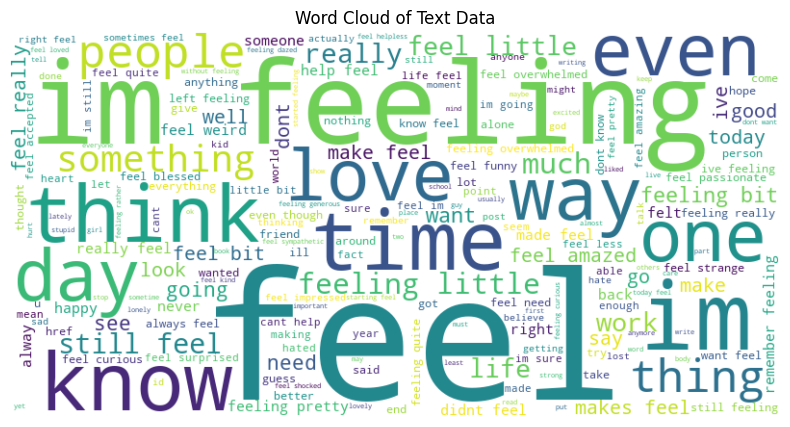

In [16]:
# Word Cloud Creation
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['Processed_Text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text Data')
plt.show()

In [17]:
count_vectorizer = CountVectorizer()
frequency_vector = count_vectorizer.fit_transform(data['Processed_Text'])

print("Shape of frequency_vector:", frequency_vector.shape)

Shape of frequency_vector: (33456, 14567)


In [18]:
tfidf_vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=True)
tfidf_vector = tfidf_vectorizer.fit_transform(data['Processed_Text'])

print("Shape of tfidf_vector:", tfidf_vector.shape)

Shape of tfidf_vector: (33456, 14567)


In [19]:
word2vec_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, sg=1)

# Transform text data into numerical features using Word2Vec embeddings
word2vec_features = []
for tokens in tokenized_text:
    feature_vec = np.zeros((100,), dtype="float32")
    n_words = 0
    for word in tokens:
        if word in word2vec_model.wv.index_to_key:
            feature_vec = np.add(feature_vec, word2vec_model.wv[word])
            n_words += 1
    if n_words != 0:
        feature_vec = np.divide(feature_vec, n_words)
    word2vec_features.append(feature_vec)

word2vec_features = np.array(word2vec_features)
print("Shape of Word2Vec features:", word2vec_features.shape)

Shape of Word2Vec features: (33456, 100)


# Question 3 - LDA(10 points)

- Apply Latent Dirichlet Allocation (LDA) to uncover themes in the text data. Set the number of topics to 8 and extract 10 keywords per topic. 
- Describe your approach, including any preprocessing steps. Present the identified topics with their keywords. 
- Discuss the importance of topic modeling in revealing hidden themes and extracting insights from the dataset.

In [20]:
lda_model = LatentDirichletAllocation(n_components=8, random_state=42)  # Initialize LDA model
lda_model.fit(frequency_vector)


def get_top_keywords(model, feature_names, n_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        topics[topic_idx] = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
    return topics

feature_names = count_vectorizer.get_feature_names_out()  # Get feature names (words)
topics = get_top_keywords(lda_model, feature_names, 10)  # Get top 10 keywords for each topic

# Displaying Topics and Keywords
for topic, keywords in topics.items():
    print(f"Topic {topic+1}: {', '.join(keywords)}")

Topic 1: feel, really, like, get, feeling, one, make, could, even, people
Topic 2: feeling, feel, like, people, little, get, things, know, time, im
Topic 3: feel, feeling, like, im, time, need, people, little, one, would
Topic 4: feel, feeling, strange, like, still, want, didnt, one, makes, know
Topic 5: feel, feeling, like, im, know, http, href, dont, back, time
Topic 6: feel, feeling, im, like, bit, want, little, sometimes, know, dont
Topic 7: feel, like, feeling, love, really, even, something, someone, im, passionate
Topic 8: feeling, im, feel, like, much, little, really, overwhelmed, pretty, ive


The approach involves utilizing Latent Dirichlet Allocation (LDA), an unsupervised topic modeling technique, to identify underlying topics in a collection of documents represented as a bag-of-words frequency vector. The preprossesing is same as in the Question-2. We are using the frequency vector for the modeling.

Topic modeling plays a crucial role in extracting hidden themes and insights from large text datasets. By automatically identifying topics and their associated keywords, it enables researchers to understand the latent structure of the data, uncover patterns, and gain deeper insights into the content without needing to manually analyze each document. 

# Question 4 - Modeling (20 points)

- Train at least three different  models.
- Choose the best feature engineering method and perform grid search & cross-validation to tune hyperparameters for three different models, optimizing their performance for emotion classification and Also, for each model, plot the ROC-AUC curve?

In [21]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_vector, data['Emotion'], test_size=0.2, random_state=42)

In [22]:
def plot_multiclass_roc_curve(model, X_test, y_test):
    # Binarize the labels
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
    n_classes = y_test_bin.shape[1]
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    y_proba = model.predict_proba(X_test)
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    column_to_class = {}
    # Loop through columns of binary label matrix and associate them with classes
    for i, class_ in enumerate(np.unique(y_test)):
        column_to_class[i] = class_

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_proba.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC curve (area = {0:0.2f})'
             ''.format(roc_auc["micro"]), color='deeppink', linestyle=':', linewidth=4)

    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(column_to_class[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

In [23]:
dt_param_grid = {
    'max_depth': [10, 20,30],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    }

dt_model = DecisionTreeClassifier(random_state = 1)

# Grid Search CV for Decision Tree
dt_grid_search = GridSearchCV(estimator=dt_model, param_grid=dt_param_grid, cv=5, scoring='accuracy', verbose = 1)
dt_grid_search.fit(X_train, y_train)

# Best parameters and best score for Decision Tree
print("Best Parameters for Decision Tree: ", dt_grid_search.best_params_)
print("Best Score for Decision Tree: ", dt_grid_search.best_score_)

best_dt_classifier = DecisionTreeClassifier(**dt_grid_search.best_params_, random_state=1)
best_dt_classifier.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters for Decision Tree:  {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1}
Best Score for Decision Tree:  0.28762600327212684


DecisionTreeClassifier(max_depth=30, max_features='sqrt', random_state=1)


Plotting ROC-AUC curve for Decision Tree...


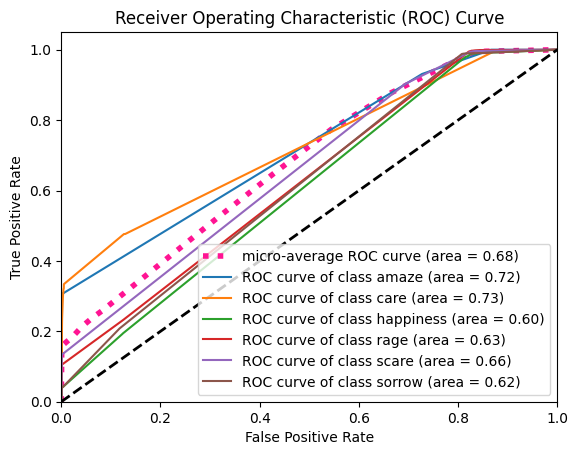

In [24]:
print(f"\nPlotting ROC-AUC curve for Decision Tree...")
plot_multiclass_roc_curve(best_dt_classifier, X_test, y_test)

In [25]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10,20,30,40],
    'min_samples_leaf': [1, 2, 4], 
    'max_features': ['sqrt', 'log2'],
}

rf_classifier = RandomForestClassifier(random_state=1)

grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=5,scoring={'accuracy': 'accuracy', 'precision': 'precision','recall': 'recall',
                                                                                                'f1': 'f1', 'roc_auc': 'roc_auc'},refit='accuracy', return_train_score=True, n_jobs=-1,verbose=1)
grid_search_rf.fit(X_train, y_train)

print("Best Parameters for Random Forest: ", grid_search_rf.best_params_)
print("Best Score for Random Forest: ", grid_search_rf.best_score_)

best_rf_classifier = RandomForestClassifier(**grid_search_rf.best_params_, random_state=1)
best_rf_classifier.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters for Random Forest:  {'max_depth': 40, 'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 200}
Best Score for Random Forest:  0.9392839451048921


RandomForestClassifier(max_depth=40, max_features='log2', n_estimators=200,
                       random_state=1)


Plotting ROC-AUC curve for Random Forest.....


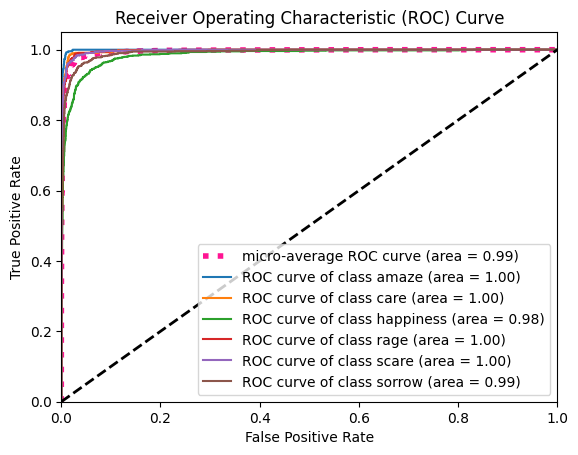

In [26]:
print(f"\nPlotting ROC-AUC curve for Random Forest.....")
plot_multiclass_roc_curve(best_rf_classifier, X_test, y_test)

In [27]:
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 1],
    'solver': ['liblinear', 'saga']
}

lr_classifier = LogisticRegression(random_state=1)

grid_search_lr = GridSearchCV(estimator=lr_classifier, param_grid=param_grid_lr, cv=5,scoring={'accuracy': 'accuracy', 'precision': 'precision','recall': 'recall',
                                                                                                'f1': 'f1', 'roc_auc': 'roc_auc'},refit='accuracy', return_train_score=True, n_jobs=-1,verbose=1)
grid_search_lr.fit(X_train, y_train)

print("Best Parameters for Logistic Regression: ", grid_search_lr.best_params_)
print("Best Score for Logistic Regression: ", grid_search_lr.best_score_)

best_lr_classifier = LogisticRegression(**grid_search_lr.best_params_, random_state=1)
best_lr_classifier.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters for Logistic Regression:  {'C': 1, 'penalty': 'l2', 'solver': 'saga'}
Best Score for Logistic Regression:  0.9493349216468309


LogisticRegression(C=1, random_state=1, solver='saga')


Plotting ROC-AUC curve for Logistic Regression.....


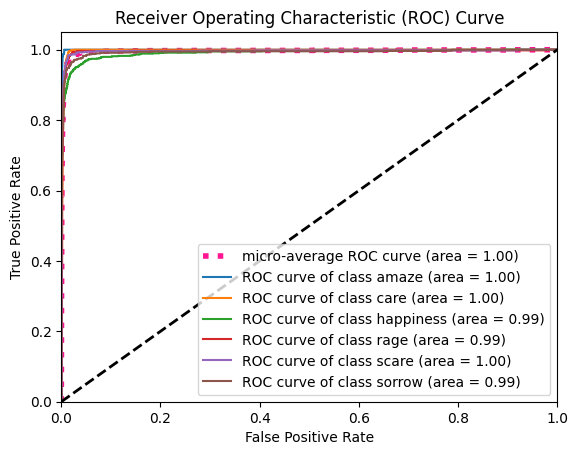

In [28]:
print(f"\nPlotting ROC-AUC curve for Logistic Regression.....")
plot_multiclass_roc_curve(best_lr_classifier, X_test, y_test)

In [29]:
from sklearn.metrics import balanced_accuracy_score

def evaluation_metrics(y_test, y_pred):
    # Calculate the balanced accuracy score
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

    # Return the balanced accuracy as a single digit number
    print('The Balanced accuracy is : ', balanced_accuracy)

In [30]:
from sklearn.model_selection import cross_val_score

models = {
    "Random Forest": best_rf_classifier,
    "Logistic Regression": best_lr_classifier,
    "Decision Tree": best_dt_classifier
}

for name, model in models.items():
    print(f"Model: {name}")
    cv_score = cross_val_score(model, X_train, y_train, cv=5)
    y_pred = model.predict(X_test)
    evaluation_metrics(y_test, y_pred)
    
    print(f"Cross-validation F1 score: {cv_score.mean()}")
    print("\n")


Model: Random Forest
The Balanced accuracy is :  0.944502483259273
Cross-validation F1 score: 0.9392839451048921


Model: Logistic Regression
The Balanced accuracy is :  0.9549746077784339
Cross-validation F1 score: 0.9493349216468309


Model: Decision Tree
The Balanced accuracy is :  0.31511271336241814
Cross-validation F1 score: 0.28762600327212684




# Question 5 - Evaluation and Reporting (20 points)

- Select a model that is expected to perform optimally on the unseen data and provide the predictions accordingly. Give clear conclusions


Based on the metrics, it seems that both Random Forest and Logistic Regression outperform Decision Tree in terms of both balanced accuracy and cross-validation F1 score.

Comparing Random Forest and Logistic Regression, we see that Logistic Regression has a slightly higher balanced accuracy (0.9549 compared to 0.9445) and cross-validation F1 score (0.9493 compared to 0.9393). This suggests that Logistic Regression might be the better-performing model in this scenario.

However, it's important to consider the context and requirements of the problem at hand. While Logistic Regression performs slightly better based on these metrics, Random Forest might have other advantages such as robustness to overfitting and handling non-linear relationships in the data. Additionally, computational efficiency could also be a factor to consider, as Random Forest tends to be more computationally expensive than Logistic Regression.

In summary, based solely on the provided metrics, Logistic Regression appears to be the better-performing model. So let us consider this. 

In [33]:
best_model = best_lr_classifier

y_predict = best_rf_classifier.predict(X_test)

evaluation_metrics(y_test,y_predict)

The Balanced accuracy is :  0.944502483259273


# Question 6 : External validation (30 pt)

- A dataset named ‘test.csv’ is provided to you in which the label is hidden. You have to choose the best model(the model which has the highest score) and then use that model to predict the label on the ‘test.csv’.
- You need to generate a csv file, named as "submission.csv". This is the inference values from your selected best model on "test.csv" data.

In [32]:
test = pd.read_csv('./data/test.csv')
test['Processed_Text'] = test['Text'].apply(preprocess_text)
tfidf_vector_test = tfidf_vectorizer.transform(test['Processed_Text'])
lr_pred_test = best_lr_classifier.predict(tfidf_vector_test)

# step 5. Save output as csv file
pred = pd.DataFrame(lr_pred_test)
pred.to_csv('./submission.csv', index = False)